<a href="https://colab.research.google.com/github/prashant2232/mask-detector-CNN/blob/main/mask_detector_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:


!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [2]:
!kaggle datasets download -d ashishjangra27/face-mask-12k-images-dataset
!unzip -q face-mask-12k-images-dataset.zip

Dataset URL: https://www.kaggle.com/datasets/ashishjangra27/face-mask-12k-images-dataset
License(s): CC0-1.0
 78% 256M/330M [00:00<00:00, 554MB/s] 
100% 330M/330M [00:06<00:00, 56.1MB/s]


In [3]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt
import os

In [4]:
base_dir = "Face Mask Dataset/Train"

train_gen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    horizontal_flip=True,
    zoom_range=0.2,
    shear_range=0.2
)

train_data = train_gen.flow_from_directory(
    base_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    subset='training'
)

val_data = train_gen.flow_from_directory(
    base_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    subset='validation'
)


Found 8000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [5]:
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224,224,3))
base_model.trainable = False  # Freeze base

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.3)(x)
x = Dense(128, activation='relu')(x)
output = Dense(1, activation='sigmoid')(x)

model = Model(inputs=base_model.input, outputs=output)


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [6]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(
    train_data,
    epochs=10,
    validation_data=val_data
)


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 139s 509ms/step - accuracy: 0.9480 - loss: 0.1108 - val_accuracy: 0.9925 - val_loss: 0.0317
Epoch 2/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 130s 484ms/step - accuracy: 0.9883 - loss: 0.0322 - val_accuracy: 0.9780 - val_loss: 0.0506
Epoch 3/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 120s 480ms/step - accuracy: 0.9925 - loss: 0.0248 - val_accuracy: 0.9925 - val_loss: 0.0253
Epoch 4/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 120s 482ms/step - accuracy: 0.9900 - loss: 0.0237 - val_accuracy: 0.9685 - val_loss: 0.0723
Epoch 5/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 139s 555ms/step - accuracy: 0.9918 - loss: 0.0254 - val_accuracy: 0.9920 - val_loss: 0.0303
Epoch 6/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 122s 489ms/step - accuracy: 0.9931 - loss: 0.0172 - val_accuracy: 0.9830 - val_loss: 0.0451
Epoch 7/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 122s 488ms/step - accuracy: 0.9908 - loss: 0.0239 - val_accuracy: 0.9925 - val_loss: 0.0263
Epoch 8/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 121s 482ms/step - accuracy: 0.9934 -

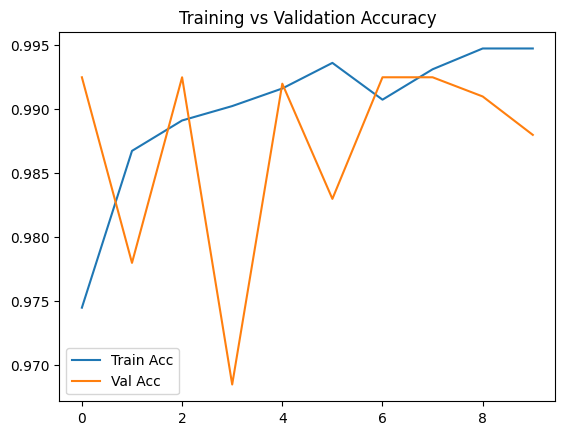

In [7]:
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.legend()
plt.title("Training vs Validation Accuracy")
plt.show()


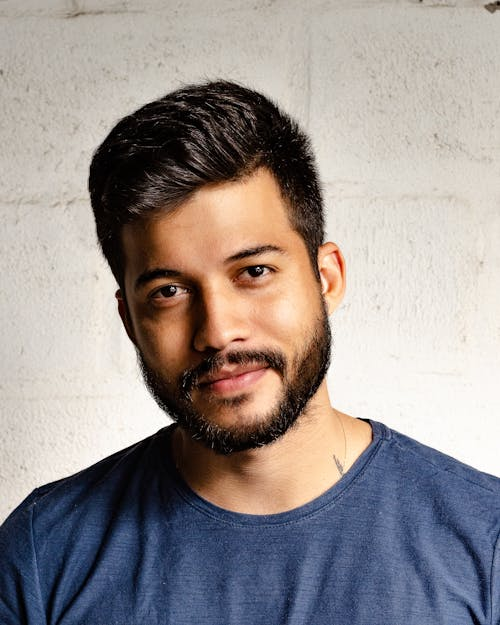

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
Prediction: ❌ No Mask (Confidence: 1.00)


In [8]:
from google.colab.patches import cv2_imshow
import cv2
import numpy as np


img = cv2.imread('/content/imageno.jpeg')  # Replace with uploaded image name
cv2_imshow(img)

img_resized = cv2.resize(img, (224, 224)) / 255.0
img_input = np.expand_dims(img_resized, axis=0)

pred = model.predict(img_input)[0][0]
print("Prediction:", "❌ No Mask" if pred > 0.5 else "😷 Mask", f"(Confidence: {pred:.2f})")


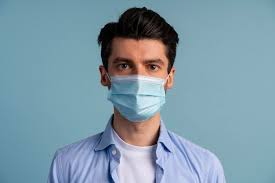

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
Prediction: 😷 Mask (Confidence: 0.00)


In [9]:
from google.colab.patches import cv2_imshow
import cv2
import numpy as np


img = cv2.imread('/content/image.jpeg')  # Replace with uploaded image name
cv2_imshow(img)

img_resized = cv2.resize(img, (224, 224)) / 255.0
img_input = np.expand_dims(img_resized, axis=0)

pred = model.predict(img_input)[0][0]
print("Prediction:", "❌ No Mask" if pred > 0.5 else "😷 Mask", f"(Confidence: {pred:.2f})")